In [152]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [153]:
df_Train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_Test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [154]:
df_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [155]:
df_Train.shape

(8523, 12)

In [156]:
df_Train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [157]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [320]:
df_Train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [321]:
df_Test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# checking null values

In [62]:
df_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [158]:
df_Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [160]:
df_Train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

# Filling null values

In [161]:
#item weight is numerical values so we fill it by mean imputation

df_Train['Item_Weight'].fillna(df_Train['Item_Weight'].mean(),inplace=True)
df_Test['Item_Weight'].fillna(df_Test['Item_Weight'].mean(),inplace=True)

In [162]:
df_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [163]:
df_Train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [164]:
#item weight is catagorical values so we fill it by mode imputation

In [165]:
df_Train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [166]:
df_Train['Outlet_Size'].fillna(df_Train['Outlet_Size'].mode()[0],inplace=True)
df_Test['Outlet_Size'].fillna(df_Test['Outlet_Size'].mode()[0],inplace=True)

In [167]:
df_Train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [168]:
df_Train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now we can see that there are no null values

In [184]:
df_Train.isnull()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False


In [185]:
df_Test.isnull()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,False
5679,False,False,False,False,False,False,False,False,False


# Data Analyst

# Describe the data

In [187]:
df_Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

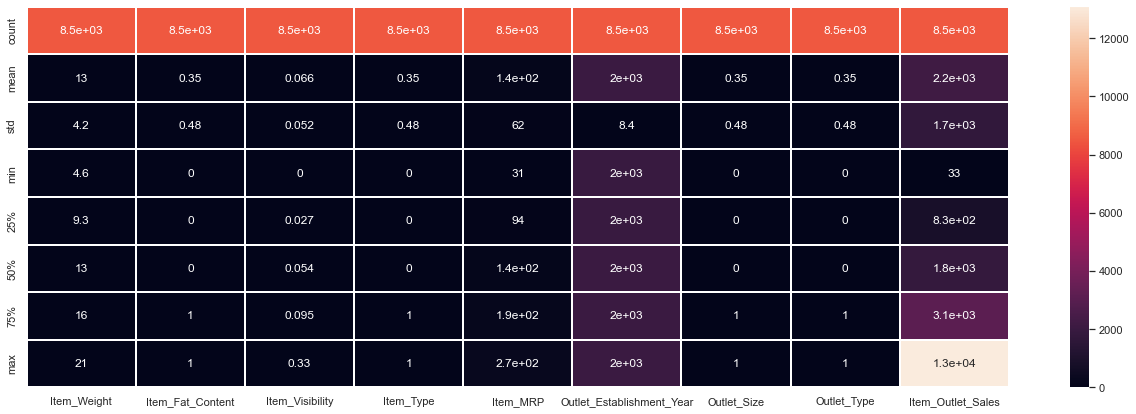

In [239]:
plt.figure(figsize=(22,7))

sns.heatmap(df_Train.describe(),annot=True,linewidths=0.1)

In [188]:
df_Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# EDA

Numecrical features

In [189]:
sns.set()

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

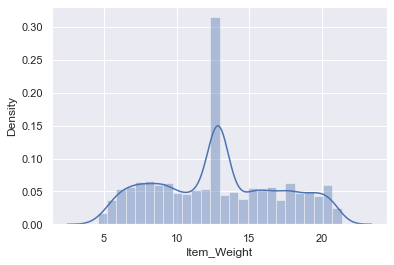

In [190]:
# Item_Weight distribution

sns.distplot(df_Train['Item_Weight'])

avrage weight is 12.5kg

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

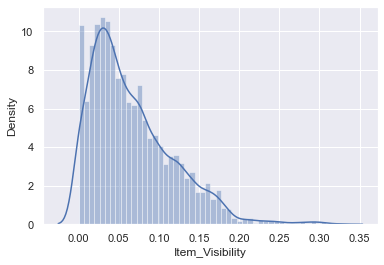

In [191]:
sns.distplot(df_Train['Item_Visibility'])

There is skewness

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

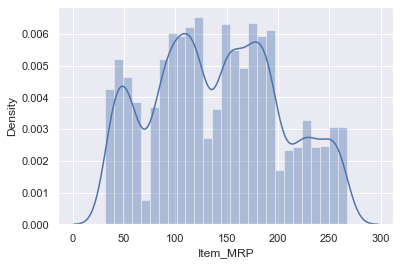

In [192]:
sns.distplot(df_Train['Item_MRP'])

this is not normal distribution

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

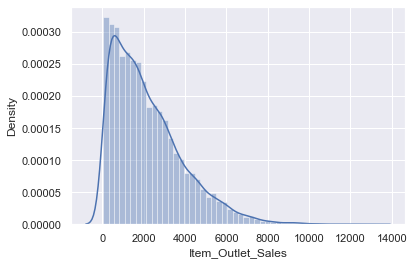

In [194]:
sns.distplot(df_Train['Item_Outlet_Sales'])

there is one side skewness , this is not normal distribution

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

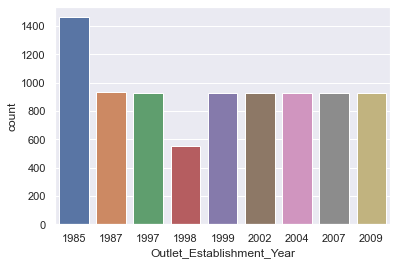

In [196]:
sns.countplot(x='Outlet_Establishment_Year',data=df_Train)

since we can see that most outlet are sold in 1985, and very less in 1998

Catagorical features:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

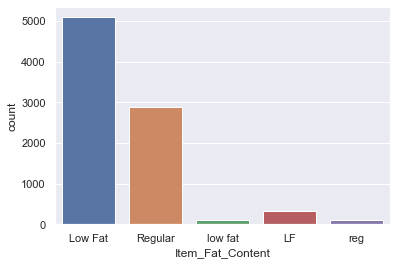

In [199]:
sns.countplot(x='Item_Fat_Content',data=df_Train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

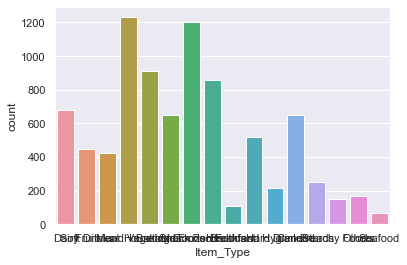

In [200]:
sns.countplot(x='Item_Type',data=df_Train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

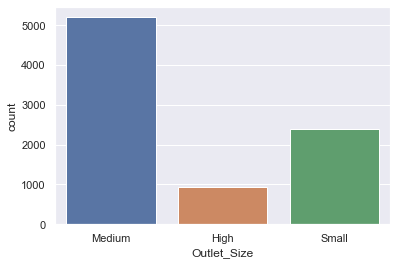

In [201]:
sns.countplot(x='Outlet_Size',data=df_Train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

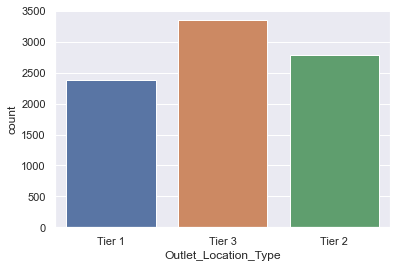

In [202]:
sns.countplot(x='Outlet_Location_Type',data=df_Train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

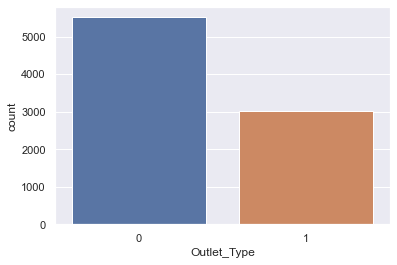

In [319]:
sns.countplot(x='Outlet_Type',data=df_Train)

Data Preprocessing

In [205]:
df_Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [208]:
df_Train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [209]:
df_Train.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [210]:
df_Train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
Label Encoding

In [211]:
encoder=LabelEncoder()

In [215]:
df_Train['Item_Fat_Content']=encoder.fit_transform(df_Train['Item_Fat_Content'])

In [216]:
df_Train['Item_Type']=encoder.fit_transform(df_Train['Item_Fat_Content'])

In [217]:
df_Train['Outlet_Size']=encoder.fit_transform(df_Train['Item_Fat_Content'])

In [218]:
df_Train['Outlet_Type']=encoder.fit_transform(df_Train['Item_Fat_Content'])

In [268]:
df_Train['Outlet_Location_Type']=encoder.fit_transform(df_Train['Item_Fat_Content'])

In [269]:
df_Train['Outlet_Type']=encoder.fit_transform(df_Train['Item_Fat_Content'])

In [322]:
df_Train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,0,0,3735.1380
1,5.920,1,0.019278,1,48.2692,2009,1,1,1,443.4228
2,17.500,0,0.016760,0,141.6180,1999,0,0,0,2097.2700
3,19.200,1,0.000000,1,182.0950,1998,1,1,1,732.3800
4,8.930,0,0.000000,0,53.8614,1987,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,0,214.5218,1987,0,0,0,2778.3834
8519,8.380,1,0.046982,1,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,0,85.1224,2004,0,0,0,1193.1136
8521,7.210,1,0.145221,1,103.1332,2009,1,1,1,1845.5976


In [323]:
df_Train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

# correlation with target variable

In [308]:
round(df_Train.corr()['Item_Outlet_Sales'].sort_values(),2)

Item_Visibility             -0.13
Outlet_Establishment_Year   -0.05
Item_Weight                  0.01
Item_Fat_Content             0.02
Item_Type                    0.02
Outlet_Size                  0.02
Outlet_Location_Type         0.02
Outlet_Type                  0.02
Item_MRP                     0.57
Item_Outlet_Sales            1.00
Name: Item_Outlet_Sales, dtype: float64

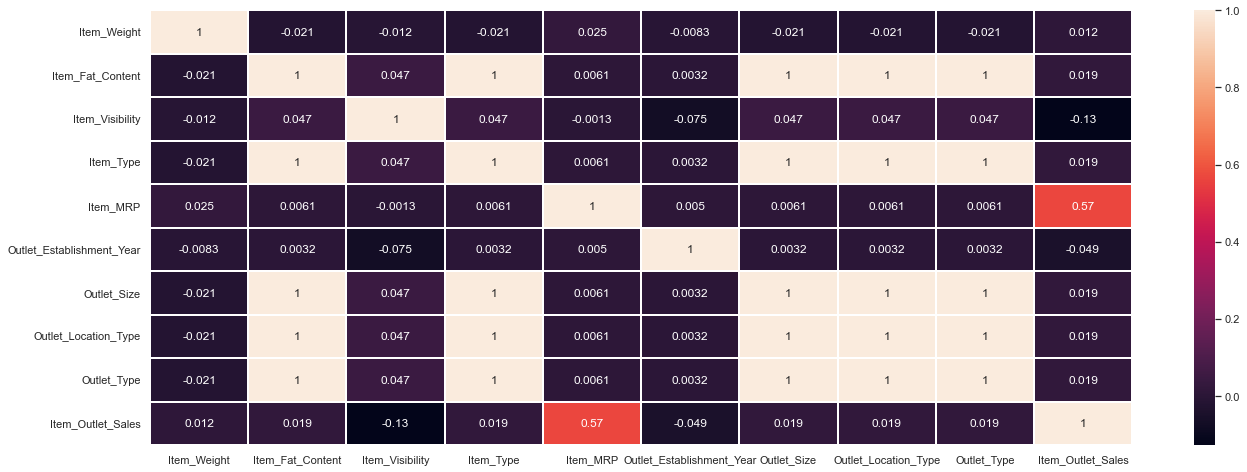

In [313]:
plt.figure(figsize=(22,8))

sns.heatmap(df_Train.corr(),annot=True,linewidths=0.1)

plt.show()

# Correlations :

In [304]:
df_Train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,-0.021157,0.024756,-0.008301,-0.021157,-0.021157,-0.021157,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,1.000000,0.006063,0.003151,1.000000,1.000000,1.000000,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,0.047314,-0.001315,-0.074834,0.047314,0.047314,0.047314,-0.128625
Item_Type,-0.021157,1.000000,0.047314,1.000000,0.006063,0.003151,1.000000,1.000000,1.000000,0.018719
Item_MRP,0.024756,0.006063,-0.001315,0.006063,1.000000,0.005020,0.006063,0.006063,0.006063,0.567574
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.003151,0.005020,1.000000,0.003151,0.003151,0.003151,-0.049135
Outlet_Size,-0.021157,1.000000,0.047314,1.000000,0.006063,0.003151,1.000000,1.000000,1.000000,0.018719
Outlet_Location_Type,-0.021157,1.000000,0.047314,1.000000,0.006063,0.003151,1.000000,1.000000,1.000000,0.018719
Outlet_Type,-0.021157,1.000000,0.047314,1.000000,0.006063,0.003151,1.000000,1.000000,1.000000,0.018719
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.018719,0.567574,-0.049135,0.018719,0.018719,0.018719,1.000000


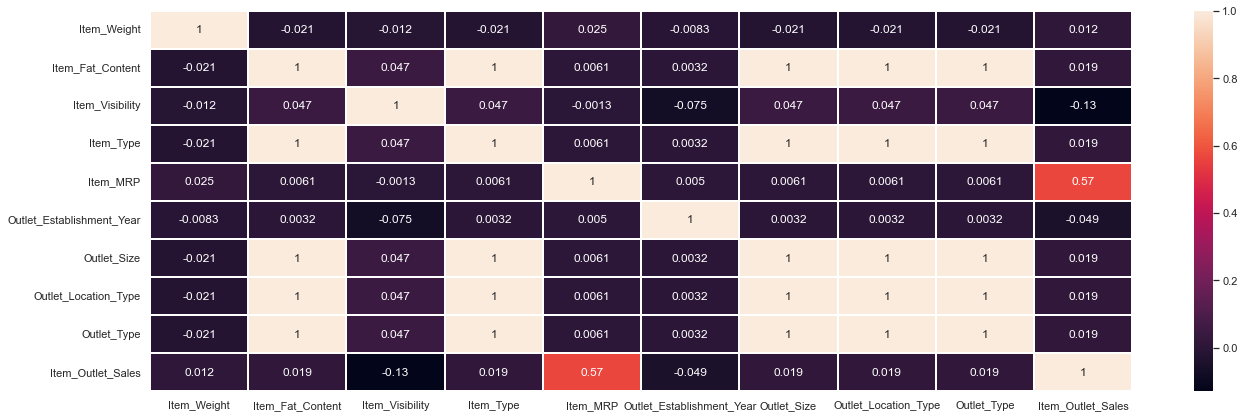

In [314]:

plt.figure(figsize=(22,7))

sns.heatmap(df_Train.corr(),annot=True,linewidths=0.1)
plt.show()

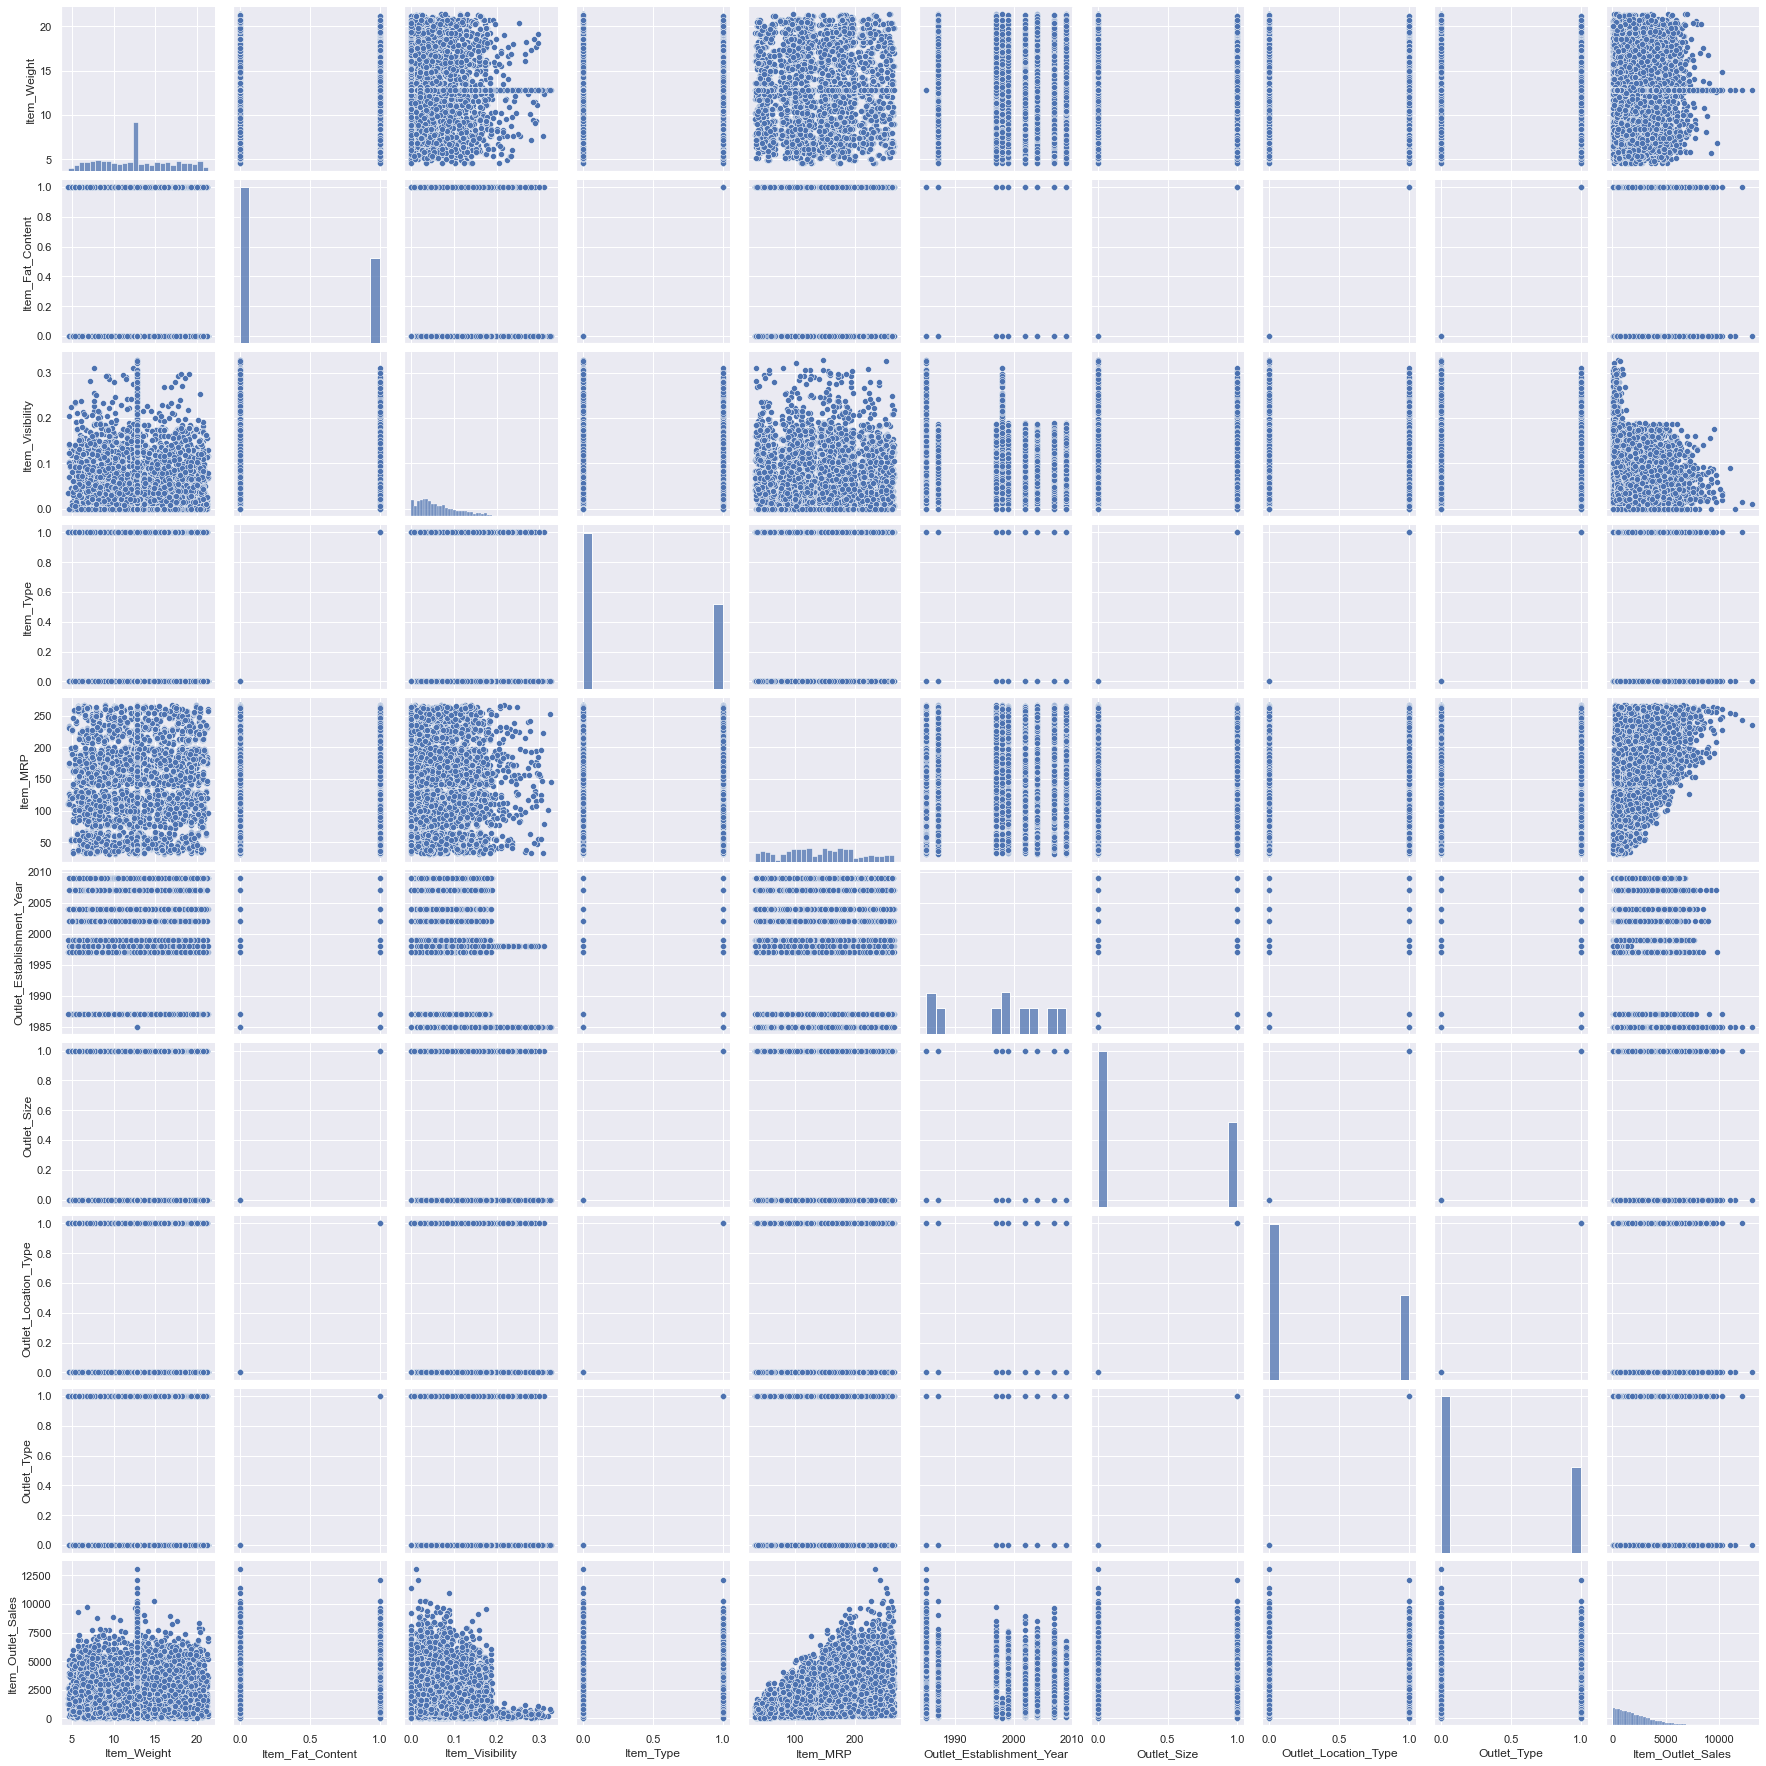

In [318]:
sns.pairplot(df_Train)

In [252]:
df_Train.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.616705
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.616705
Outlet_Type                  0.616705
Item_Outlet_Sales            1.177531
dtype: float64

Since no has skewness we can not treat that

# Outlier Check:-

In [271]:
df_Train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

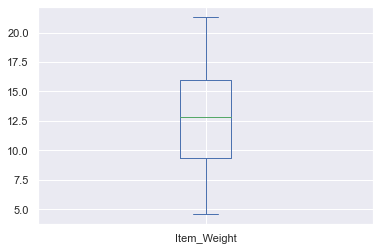

In [257]:
df_Train['Item_Weight'].plot.box()

<AxesSubplot:>

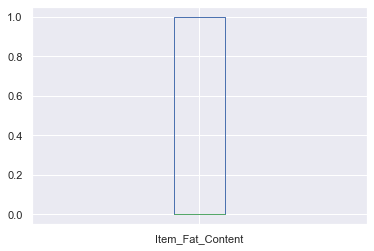

In [259]:
df_Train['Item_Fat_Content'].plot.box()

<AxesSubplot:>

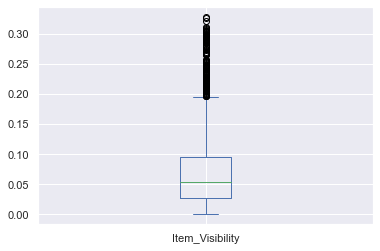

In [260]:
df_Train['Item_Visibility'].plot.box()

Outlires is present

<AxesSubplot:>

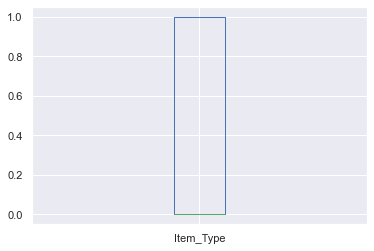

In [261]:
df_Train['Item_Type'].plot.box()

<AxesSubplot:>

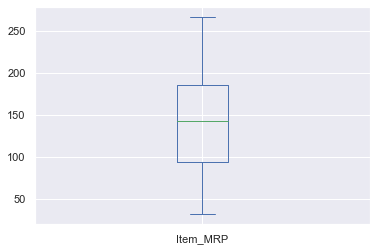

In [262]:
df_Train['Item_MRP'].plot.box()

Outliers is not present

<AxesSubplot:>

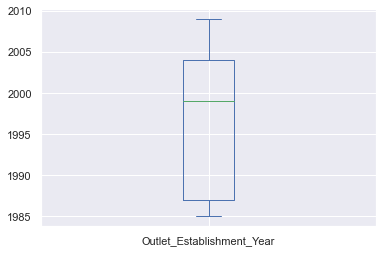

In [263]:
df_Train['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

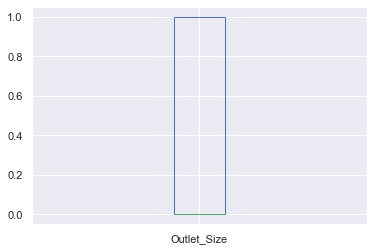

In [264]:
df_Train['Outlet_Size'].plot.box()

<AxesSubplot:>

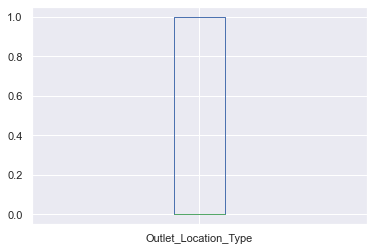

In [273]:
df_Train['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

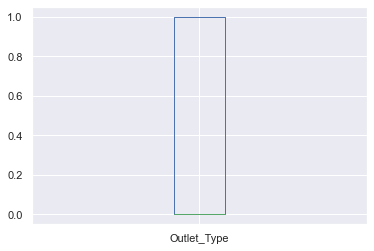

In [274]:
df_Train['Outlet_Type'].plot.box()

<AxesSubplot:>

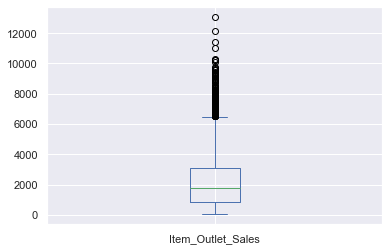

In [275]:
df_Train['Item_Outlet_Sales'].plot.box()

Outliers is present

<AxesSubplot:>

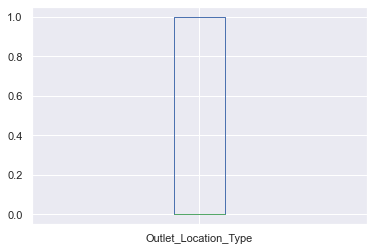

In [277]:
df_Train['Outlet_Location_Type'].plot.box()

# Considering the outliers removal

In [278]:
df_Train.shape

(8523, 10)

In [280]:
from scipy.stats import zscore
import numpy as np

In [283]:
z=np.abs(zscore(df_Train))

threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [284]:
z.iloc[2]

Item_Weight                  1.098554
Item_Fat_Content             0.738147
Item_Visibility              0.956917
Item_Type                    0.738147
Item_MRP                     0.010040
Outlet_Establishment_Year    0.139541
Outlet_Size                  0.738147
Outlet_Location_Type         0.738147
Outlet_Type                  0.738147
Item_Outlet_Sales            0.049238
Name: 2, dtype: float64

In [290]:
df_Train['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [291]:
df_Train['Item_Visibility'].nunique()

7880

In [293]:
df_Train['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [294]:
df_Train['Item_Outlet_Sales'].nunique()

3493

In [287]:
df_new_z=df_Train[(z<3).all(axis=1)]

In [295]:
df_new_z

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,0,0,3735.1380
1,5.920,1,0.019278,1,48.2692,2009,1,1,1,443.4228
2,17.500,0,0.016760,0,141.6180,1999,0,0,0,2097.2700
3,19.200,1,0.000000,1,182.0950,1998,1,1,1,732.3800
4,8.930,0,0.000000,0,53.8614,1987,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,0,214.5218,1987,0,0,0,2778.3834
8519,8.380,1,0.046982,1,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,0,85.1224,2004,0,0,0,1193.1136
8521,7.210,1,0.145221,1,103.1332,2009,1,1,1,1845.5976


In [404]:
Data_Loss=((8523-8338)/8523)*100

In [405]:
print(Data_Loss,'%')

2.170597207556025 %


# dimensional reduction

# droping columns which is not important

In [ ]:
df_Train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_Test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [408]:
df_Train.shape

(8523, 10)

In [409]:
df_Test.shape

(5681, 9)

# spiting into data train and test

In [410]:
df_Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,1999,0,0,0,3735.1380
1,5.92,1,0.019278,1,48.2692,2009,1,1,1,443.4228
2,17.50,0,0.016760,0,141.6180,1999,0,0,0,2097.2700
3,19.20,1,0.000000,1,182.0950,1998,1,1,1,732.3800
4,8.93,0,0.000000,0,53.8614,1987,0,0,0,994.7052


In [413]:
x=df_Train.iloc[:,:-1]

In [414]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,0,249.8092,1999,0,0,0
1,5.920,1,0.019278,1,48.2692,2009,1,1,1
2,17.500,0,0.016760,0,141.6180,1999,0,0,0
3,19.200,1,0.000000,1,182.0950,1998,1,1,1
4,8.930,0,0.000000,0,53.8614,1987,0,0,0
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,0,214.5218,1987,0,0,0
8519,8.380,1,0.046982,1,108.1570,2002,1,1,1
8520,10.600,0,0.035186,0,85.1224,2004,0,0,0
8521,7.210,1,0.145221,1,103.1332,2009,1,1,1


In [416]:
y=df_Train.iloc[:,-1]

In [417]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Scalling the data Min-Max Scaler:

In [419]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [420]:
import warnings
warnings.filterwarnings('ignore')

In [426]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')
          

At random state 0,the training accuracy is:- 0.3430362593287509
At random state 0,the training accuracy is :- 0.3411656783648467


At random state 1,the training accuracy is:- 0.34186389246776594
At random state 1,the training accuracy is :- 0.3457269690259188


At random state 2,the training accuracy is:- 0.3470209995221535
At random state 2,the training accuracy is :- 0.32468736594629544


At random state 3,the training accuracy is:- 0.33528046994465244
At random state 3,the training accuracy is :- 0.37109034944487074


At random state 4,the training accuracy is:- 0.34124047336903374
At random state 4,the training accuracy is :- 0.3486355055347081


At random state 5,the training accuracy is:- 0.34335595323357093
At random state 5,the training accuracy is :- 0.3398346945801479


At random state 6,the training accuracy is:- 0.3348973213124171
At random state 6,the training accuracy is :- 0.37330019624365374


At random state 7,the training accuracy is:- 0.3407601829021367
At random st

In [427]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=0.2)

In [429]:
# train the model

lr.fit(x_train,y_train)

LinearRegression()

In [431]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.3556372502043519


# Cross_Validation of the model

In [433]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}')
    print('\n')

At cross fold2 the cv score is 0.3420292279377326 and accuracy score for training is -0.32351239849751545 and accuracy for testing is 0.3556372502043519


At cross fold3 the cv score is 0.3421244554744116 and accuracy score for training is -0.32351239849751545 and accuracy for testing is 0.3556372502043519


At cross fold4 the cv score is 0.34123041964151934 and accuracy score for training is -0.32351239849751545 and accuracy for testing is 0.3556372502043519


At cross fold5 the cv score is 0.34168102267993766 and accuracy score for training is -0.32351239849751545 and accuracy for testing is 0.3556372502043519


At cross fold6 the cv score is 0.341064406211566 and accuracy score for training is -0.32351239849751545 and accuracy for testing is 0.3556372502043519


At cross fold7 the cv score is 0.34168742981865163 and accuracy score for training is -0.32351239849751545 and accuracy for testing is 0.3556372502043519


At cross fold8 the cv score is 0.3410903886658989 and accuracy score

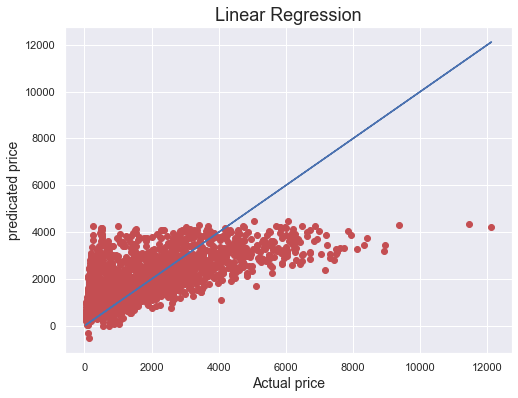

In [435]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual price',fontsize=14)
plt.ylabel('predicated price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [436]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

In [437]:
from sklearn.linear_model import Lasso


Parameters = {'alpha':[.0001,.001,.01,.1,10],
             'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,Parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [438]:
# final model training

ls = Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

33.94366646148067

In [439]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss*100

35.563657091755566